In [116]:
from fastai.tabular import * 
from pathlib import Path
from random import sample
import seaborn as sns
import xgboost as xgb


ModuleNotFoundError: No module named 'xgboost'

In [50]:
path = Path('/home/dsw/data/fannieMae/txt_data')

In [74]:
acq_cols =['loan_id', 'orig_chn', 'seller', 'orig_rt', 'orig_amt', 'orig_trm', 'x_orig_date',
           'x_first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'fthb_flg', 'purpose', 'prop_typ', 'num_unit',
           'occ_stat', 'state', 'zip_3', 'mi_pct', 'x_prod_type', 'cscore_c', 'mi_type', 'relo_flg']

perf_cols = ['loan_id', 'x_period', 'y_servicer', 'y_curr_rte', 'y_act_upb', 'x_loan_age', 
             'y_rem_mths', 'x_adj_rem_months', 'x_maturity_date', 'msa', 'x_dlq_status', 
             'y_mod_ind', 'z_zb_code', 'x_zb_date', 'x_lpi_dte', 'x_fcc_dte', 'x_disp_dte', 
             'fcc_cost', 'pp_cost', 'ar_cost', 'ie_cost', 'tax_cost', 'ns_procs', 'ce_procs', 
             'rmw_procs', 'o_procs', 'non_int_upb', 'prin_forg_upb_fhfa', 'repch_flag', 
             'prin_forg_upb_o', 'serv_transfer']

In [69]:
%%time
acq_df = pd.read_csv(path/'Acquisition_2000Q1.txt', delimiter='|', index_col= False, header=None,  names= acq_cols)
acq_df['orig_dte'] = pd.to_datetime(acq_df['x_orig_date'],infer_datetime_format=True)
acq_df['frst_dte'] = pd.to_datetime(acq_df['x_first_pay'],infer_datetime_format=True)
acq_df.drop(columns=['x_orig_date','x_first_pay'], inplace=True)
acq_df.head()

,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,...,occ_stat,state,zip_3,mi_pct,x_prod_type,cscore_c,mi_type,relo_flg,orig_dte,frst_dte
0,100007365142,R,"JPMORGAN CHASE BANK, NA",8.000,75000,360,79.0,NaN,1.0,62.0,...,1,P,PA,173,NaN,FRM,NaN,NaN,1999-12-01,2000-02-01
1,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000,180,69.0,NaN,1.0,12.0,...,1,P,MD,208,NaN,FRM,NaN,NaN,2000-01-01,2000-03-01
2,100011322040,C,AMTRUST BANK,7.750,123000,360,80.0,NaN,1.0,28.0,...,1,P,MO,630,NaN,FRM,NaN,NaN,1999-11-01,2000-01-01
3,100015192562,R,OTHER,8.500,51000,360,95.0,NaN,1.0,27.0,...,1,P,GA,316,25.0,FRM,NaN,1.0,2000-02-01,2000-04-01
4,100015874399,C,"CITIMORTGAGE, INC.",8.750,242000,360,95.0,NaN,1.0,47.0,...,1,P,FL,335,30.0,FRM,NaN,1.0,2000-02-01,2000-04-01


In [72]:
acq_df.dtypes

loan_id                 int64
orig_chn               object
seller                 object
orig_rt               float64
orig_amt                int64
orig_trm                int64
oltv                  float64
ocltv                 float64
num_bo                float64
dti                   float64
fthb_flg              float64
purpose                object
prop_typ               object
num_unit               object
occ_stat                int64
state                  object
zip_3                  object
mi_pct                  int64
x_prod_type           float64
cscore_c               object
mi_type               float64
relo_flg              float64
orig_dte       datetime64[ns]
frst_dte       datetime64[ns]
dtype: object

In [76]:
perf_df = pd.read_csv(path/'Performance_2000Q1.txt', delimiter='|', index_col= False, header=None,  names= perf_cols)
perf_df.drop_duplicates(subset='loan_id', keep='last', inplace=True)
perf_df['zb_dte'] = pd.to_datetime(perf_df['x_zb_date'],infer_datetime_format=True)
perf_df['maturity_date'] = pd.to_datetime(perf_df['x_maturity_date'],infer_datetime_format=True)
perf_df['monthly_rpr_prd'] = pd.to_datetime(perf_df['x_period'],infer_datetime_format=True)
perf_df['lpi_date'] = pd.to_datetime(perf_df['x_lpi_dte'],infer_datetime_format=True)
perf_df['fcc_date'] = pd.to_datetime(perf_df['x_fcc_dte'],infer_datetime_format=True)
perf_df['disp_date'] = pd.to_datetime(perf_df['x_disp_dte'],infer_datetime_format=True)
perf_df.drop(columns=['x_zb_date','x_maturity_date','x_period','x_lpi_dte', 'x_fcc_dte', 'x_disp_dte'], inplace=True)

In [77]:
perf_df.dtypes

loan_id                        int64
y_servicer                    object
y_curr_rte                   float64
y_act_upb                    float64
x_loan_age                     int64
y_rem_mths                   float64
x_adj_rem_months             float64
msa                            int64
x_dlq_status                  object
y_mod_ind                     object
z_zb_code                    float64
fcc_cost                     float64
pp_cost                      float64
ar_cost                      float64
ie_cost                      float64
tax_cost                     float64
ns_procs                     float64
ce_procs                     float64
rmw_procs                    float64
o_procs                      float64
non_int_upb                  float64
prin_forg_upb_fhfa           float64
repch_flag                    object
prin_forg_upb_o              float64
serv_transfer                 object
zb_dte                datetime64[ns]
maturity_date         datetime64[ns]
m

In [78]:
df = pd.merge(acq_df, perf_df, on='loan_id', how='inner')

In [79]:
df.rename(index=str, columns={"fcc_date": 'Default'}, inplace=True)
df['Default'].fillna(0, inplace=True)
df.loc[df['Default'] != 0, 'Default'] = 1

df['Default'] = df['Default'].astype(int)

In [80]:
df.head()

,loan_id,orig_chn,seller,orig_rt,orig_amt,orig_trm,oltv,ocltv,num_bo,dti,...,prin_forg_upb_fhfa,repch_flag,prin_forg_upb_o,serv_transfer,zb_dte,maturity_date,monthly_rpr_prd,lpi_date,Default,disp_date
0,100007365142,R,"JPMORGAN CHASE BANK, NA",8.000,75000,360,79.0,NaN,1.0,62.0,...,NaN,N,NaN,NaN,2003-04-01,2030-01-01,2003-04-01,NaT,0,NaT
1,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000,180,69.0,NaN,1.0,12.0,...,NaN,N,NaN,NaN,2001-05-01,2015-02-01,2001-05-01,NaT,0,NaT
2,100011322040,C,AMTRUST BANK,7.750,123000,360,80.0,NaN,1.0,28.0,...,NaN,N,NaN,NaN,2003-04-01,2029-12-01,2003-04-01,NaT,0,NaT
3,100015192562,R,OTHER,8.500,51000,360,95.0,NaN,1.0,27.0,...,NaN,N,NaN,NaN,2004-12-01,2030-03-01,2004-12-01,NaT,0,NaT
4,100015874399,C,"CITIMORTGAGE, INC.",8.750,242000,360,95.0,NaN,1.0,47.0,...,NaN,N,NaN,NaN,2002-09-01,2030-03-01,2002-09-01,NaT,0,NaT


In [57]:
df.dtypes

loan_id          int64
orig_chn        object
seller          object
orig_rt        float64
orig_amt         int64
orig_trm         int64
x_orig_date     object
x_first_pay     object
oltv           float64
ocltv          float64
num_bo         float64
dti            float64
fthb_flg       float64
purpose         object
prop_typ        object
num_unit        object
occ_stat         int64
state           object
zip_3           object
mi_pct           int64
x_prod_type    float64
cscore_c        object
mi_type        float64
relo_flg       float64
Default          int64
dtype: object

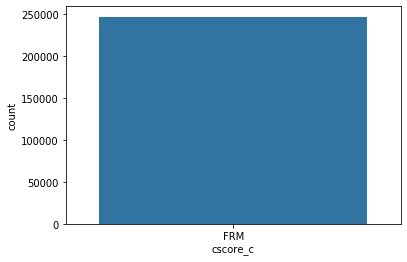

In [92]:
sns.countplot(df['cscore_c'])

In [81]:
procs = [FillMissing, Categorify, Normalize]

In [100]:
range(len(df))

range(0, 246863)

In [102]:
int(len(df)*.2)

49372

In [104]:
#valid_idx = range(len(df)-int(len(df)*.8), len(df))
valid_idx = sample(range(len(df)), int(len(df)*.2))

In [105]:
dep_var = 'Default'
cont_names=['orig_rt', 'orig_amt', 'orig_trm', 'oltv','ocltv']
cat_names = ['orig_chn', 'seller', 'purpose', 'occ_stat', 'prop_typ', 'state', 'zip_3', 'relo_flg', 'mi_type', 'num_unit']

In [113]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, 
                                procs=procs, cont_names=cont_names, cat_names=cat_names,
                                device=torch.device('cuda')
                               )
print(data.train_ds.cont_names)

['orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv']


In [114]:
get_emb_szs(data)

NameError: name 'get_emb_szs' is not defined

In [119]:
#learn = tabular_learner(data, layers=[200,100], emb_szs={'native-country': 10}, metrics=accuracy)
learn = tabular_learner(data, layers=[500,200], metrics=[accuracy, r2_score])
learn.model = torch.nn.DataParallel(learn.model)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,r2_score,time


AssertionError: Expected output and target to have the same number of elements but got 128 and 64.

In [120]:
show_doc(auc_roc_score, title_level=3)

NameError: name 'show_doc' is not defined

In [38]:
df.apply(lambda x: x.isnull().sum(), axis=0)

loan_id             0
orig_chn            0
seller              0
orig_rt             0
orig_amt            0
orig_trm            0
x_orig_date         0
x_first_pay         0
oltv                2
ocltv          245884
num_bo            295
dti             10531
fthb_flg         5924
purpose             0
prop_typ            0
num_unit            0
occ_stat            0
state               0
zip_3               0
mi_pct              0
x_prod_type    165047
cscore_c            0
mi_type        123529
relo_flg       165047
Default             0
dtype: int64

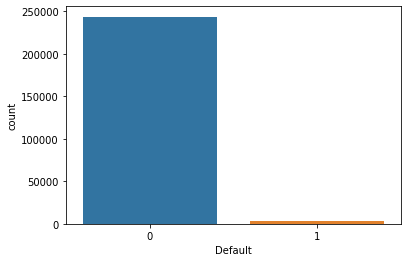

In [42]:
sns.countplot(df['Default']);